<a href="https://colab.research.google.com/github/s-choung/Simulation_tutorials/blob/main/mace_calculator_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colab에서 수행한 내용들 내드라이브에 저장하기 위함. 안해도 되는과정

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


mace calculator설치과정. torch기반이라 용량이 커서 오래걸림 max 5분

In [3]:
!pip install --upgrade pip
!pip install mace-torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.7/387.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

ase와 pymatgen은 시뮬레이션 자동화의 유용한 툴들이 많이 모여있음. 이번 튜토리얼은 ase로 주로 진행

In [6]:
!pip install ase pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.2/809.2 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 30.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing 

povray라는 visualization프로그램임. 사진찍는 각도나 perspective형태, 색 등등 다 costomize가능.

In [4]:
!sudo apt-get install povray  ## visulization program

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-povray libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  fonts-povray libsdl1.2debian povray povray-includes
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,792 kB of archives.
After this operation, 5,199 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-povray all 1:3.7.0.10-1 [70.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libsdl1.2debian amd64 1.2.15+dfsg2-6 [177 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 povray amd64 1:3.7.0.10-1 [1,312 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 povray-includes all 1:3.7.0.10-1 [233 kB]
Fetched 1,792 kB in 1s (1,987 kB/s)
debconf: unable to initialize frontend: Dialo

povray module

In [18]:
import ipywidgets as widgets
from IPython.display import display_png, Image as ImageWidget
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil
import glob
from pathlib import Path
from PIL import Image, ImageDraw

import numpy as np
from scipy.spatial.distance import cdist

def visual(structure, index, max_size=(100, 100), stretch_y=1.0,rotation='15z,-90x',png_save_path='hi'):
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = f'./temp.png'
    img = Image.open(image_path)

    # Calculate new size with stretch factor
    new_size = (max_size[0], int(max_size[1] * stretch_y))
    img = img.resize(new_size, Image.LANCZOS)
    display(img)
    # Move files to output directory
    files = ['./temp.ini', './temp.pov', f'./temp.png']
    destination = './output/'

    # Ensure destination directory exists
    os.makedirs(destination, exist_ok=True)

    for file in files:
        # Remove the file in the destination directory if it exists
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        # If the file is temp.png, rename it to index.png before moving
        if file == './temp.png':
            new_file_name = png_save_path+f'{index}.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))

ase와 pymatgen에는 유용한 library가 많은데 자주쓰는거는 미리 import해놨습니다. source code나. documentation들어가서필요한 module들 가져다 쓰시면 됩니다.

In [ ]:
from ase import Atoms
from ase.io import Trajectory, write
from ase.build import bulk, surface, molecule, add_adsorbate, fcc111
from ase.constraints import ExpCellFilter, StrainFilter, FixAtoms, FixedPlane, FixBondLength
from ase.optimize import LBFGS, BFGS, FIRE
from ase.neb import NEB
from ase.vibrations import Vibrations
from ase.thermochemistry import IdealGasThermo
from ase.visualize import view
from ase.build.rotate import minimize_rotation_and_translation
from ase.md import MDLogger
from ase.io.vasp import read_vasp

from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.core.surface import SlabGenerator
from pymatgen.io.ase import AseAtomsAdaptor

mace_mp calculator. upload. macemp 는 materials project mptrj로 학습된 pretrained 모델이며, 양자계산이 아니라서 정확도를 장담할 수 없음.

In [28]:
from mace.calculators import mace_mp
from ase import build

calc = mace_mp(model="medium", dispersion=False, default_dtype="float32")

Using Materials Project MACE for MACECalculator with /root/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


In [29]:
from ase.optimize import LBFGS
from ase.build import fcc111, molecule, add_adsorbate
from ase.constraints import ExpCellFilter, StrainFilter
import json

def energy_cal(atoms, fmax=0.05):
    atoms.calc = calc
    opt1 = LBFGS(atoms)
    opt1.run(fmax=fmax)
    return atoms.get_total_energy()
def status(proceed):
    num = int(proceed/5)
    return '🟩'*num+'⬜️'*(20-num)

water gas

       Step     Time          Energy          fmax
LBFGS:    0 01:36:00      -14.159367        0.226163
LBFGS:    1 01:36:01      -14.160193        0.065137
LBFGS:    2 01:36:01      -14.160244        0.022162


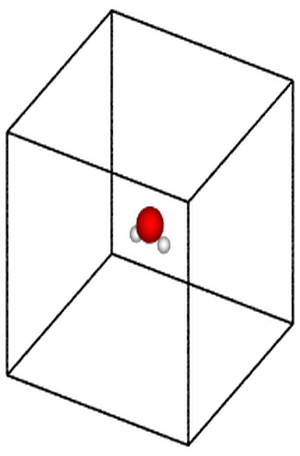

-14.16


In [30]:
from ase import build

atoms = build.molecule('H2O')
atoms.cell = [10,10,10]
atoms.positions=atoms.positions+[5,5,5]
atoms_energy=energy_cal(atoms)
visual(atoms, 'test', (300, 300),1.52,'60z,-60x','./')
print(round(atoms_energy,2))

bulk

Atomic numbers: [78 78 78 78]
Chemical symbols: ['Pt', 'Pt', 'Pt', 'Pt']
Positions: [[0.  0.  0. ]
 [0.  1.8 1.8]
 [1.8 0.  1.8]
 [1.8 1.8 0. ]]
Initial charges: [0. 0. 0. 0.]
       Step     Time          Energy          fmax
LBFGS:    0 02:03:23      -18.290155        0.000001
-18.29


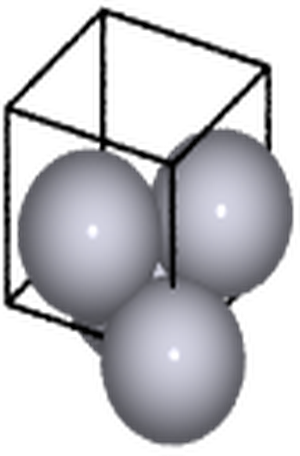

In [74]:
from ase.build import bulk, surface, molecule, add_adsorbate, fcc111


# Create a bulk copper (Cu) crystal
bulk_example = bulk('Pt', 'fcc', a=3.6, cubic=True)

print("Atomic numbers:", bulk_example.get_atomic_numbers())
print("Chemical symbols:", bulk_example.get_chemical_symbols())
print("Positions:", bulk_example.get_positions())
print("Initial charges:", bulk_example.get_initial_charges())

bulk_example_energy=energy_cal(bulk_example)
print(round(bulk_example_energy,2))
visual(bulk_example, 'test', (300, 300),1.52,'60z,-60x','./')

숙제: 모든 메탈에 대해서, 최적의 bulk lattice constant와 EOS그리고, bulk modulus구하기

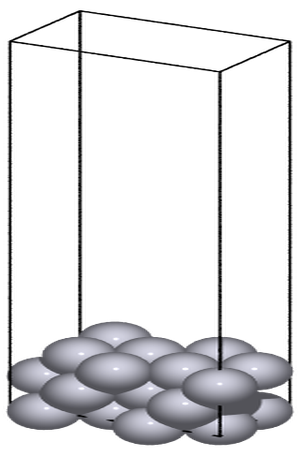

Atomic numbers: [28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28]
Chemical symbols: ['Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni', 'Ni']
Positions: [[ 1.90918826e+00 -2.30857031e-07  2.01255049e+00]
 [ 1.90918834e+00  3.60000003e+00  2.01255053e+00]
 [ 1.90918832e+00  7.20000010e+00  2.01255051e+00]
 [ 4.45477266e+00 -1.88366688e-07  2.01255051e+00]
 [ 4.45477268e+00  3.59999997e+00  2.01255054e+00]
 [ 4.45477264e+00  7.20000003e+00  2.01255061e+

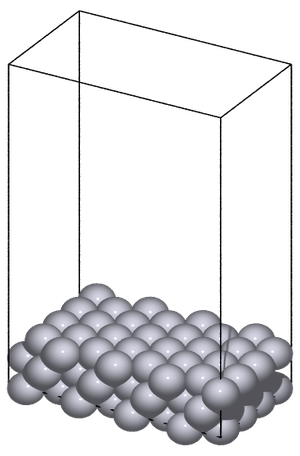

In [75]:
from ase.build import fcc111
surf_example = fcc111('Pt', size=[2, 4, 3], a=3.55, orthogonal=True)
surf_example.cell = [5.020458146424487, 8.695688586880282, 30.0]
visual(surf_example, 'test', (300, 300),1.52,'60z,-60x','./')
surf_example=surf_example*(2,2,1)
print("Atomic numbers:", atoms.get_atomic_numbers())
print("Chemical symbols:", atoms.get_chemical_symbols())
print("Positions:", atoms.get_positions())
visual(surf_example, 'test', (300, 300),1.52,'60z,-60x','./')

slab generation advanced

The (1, 1, 0) slab has 1 termination.
MSONAtoms(symbols='Pt72', pbc=True, cell=[[7.636753236814712, 0.0, 4.676162703671664e-16], [1.7367724616507675e-15, 10.8, 6.613092715395707e-16], [0.0, 0.0, 30.547012947258857]], bulk_equivalent=..., bulk_wyckoff=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]))


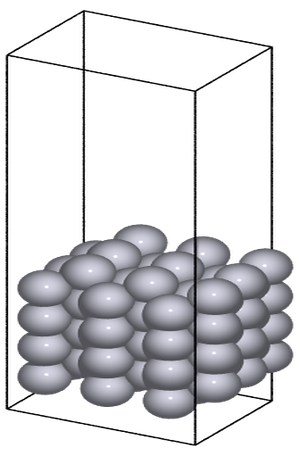

The (1, 1, 1) slab has 1 termination.
MSONAtoms(symbols='Pt36', pbc=True, cell=[[7.6294627786021945, 0.0, 0.3336131141362166], [3.807437447830159, 6.611514378032986, 0.3336131141362166], [0.0, 0.0, 29.135545301229563]], bulk_equivalent=..., bulk_wyckoff=..., constraint=FixAtoms(indices=[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]))


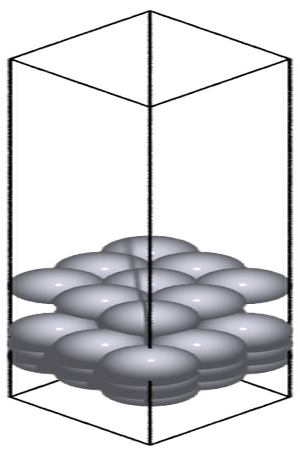

The (1, 0, 0) slab has 1 termination.
MSONAtoms(symbols='Pt54', pbc=True, cell=[[7.636753236814712, 0.0, 4.676162703671664e-16], [1.2280835850113105e-15, 7.636753236814712, 4.676162703671664e-16], [0.0, 0.0, 32.4]], bulk_equivalent=..., bulk_wyckoff=..., constraint=FixAtoms(indices=[18, 19, 20, 21, 22, 23, 24, 25, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]))


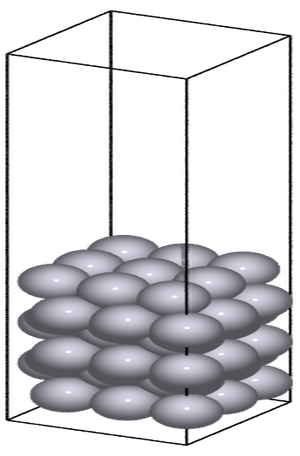

In [88]:
import os
import sys
import re, glob
import shutil
import time
import math
import numpy as np
from os import listdir
from os.path import isfile, join, isdir, expanduser, basename
from tabulate import tabulate
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.core.surface import Lattice, SlabGenerator, Structure, generate_all_slabs
from pymatgen.io.vasp.inputs import Poscar
from pymatgen.io.ase import AseAtomsAdaptor
from ase.constraints import FixAtoms

def slab_generation(bulk,facet,supercell_size,thick):
    pymatgen_structure = AseAtomsAdaptor.get_structure(bulk)
    slabgen = SlabGenerator(pymatgen_structure, facet, thick, 20) #miller, min-slab size, vaccum size in angstroms
    all_slabs = slabgen.get_slabs()
    for slabs in all_slabs:
      slabs.make_supercell(supercell_size)

    print(f"The {facet} slab has %s termination." % (len(all_slabs)))
    slab_atoms_list = [AseAtomsAdaptor.get_atoms(slab) for slab in all_slabs] # ase transformation
    for idx,slab_atoms in enumerate(slab_atoms_list): # termination 여러가지 표면이 나올수있음.
      slab=slab_atoms.copy()
      min_pos_z = np.min(slab.positions, axis=0)[2]
      slab.set_positions(slab.positions - [0, 0, min_pos_z-3])
      ase_slab_z_positions=[atom.position[2] for atom in slab]
      c = FixAtoms(indices=[atom.index for atom in slab if atom.position[2] <np.median(ase_slab_z_positions)])
      slab.set_constraint(c)
      print(slab)
      visual(slab, f'{facet}', (300, 300),1.52,'60z,-60x','./')

      min_z = np.min(slab.positions[:, 2])

      shift_value = 5.0 - min_z

      slab.positions[:, 2] += shift_value

      #write(f'/content/drive/MyDrive//test_{idx}_{facet}.vasp',slab)
    return slab

##########surf 정보 넣기############
facets = [(1,1,0),(1,1,1),(1,0,0)]
##############################

slab_list=[]
for idx,facet in enumerate(facets):
  slab = slab_generation(bulk_example,facets[idx],[3,3,1],8)
  slab_list.append(slab)


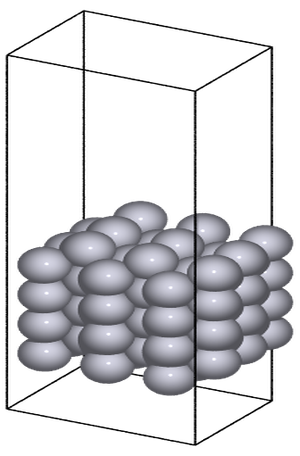

Positions: [[ 1.90918831  0.          6.27279221]
 [ 1.90918831  3.6         6.27279221]
 [ 1.90918831  7.2         6.27279221]
 [ 4.45477272  0.          6.27279221]
 [ 4.45477272  3.6         6.27279221]
 [ 4.45477272  7.2         6.27279221]
 [ 7.00035713  0.          6.27279221]
 [ 7.00035713  3.6         6.27279221]
 [ 7.00035713  7.2         6.27279221]
 [ 0.6363961   1.8         5.        ]
 [ 0.6363961   5.4         5.        ]
 [ 0.6363961   9.          5.        ]
 [ 3.18198052  1.8         5.        ]
 [ 3.18198052  5.4         5.        ]
 [ 3.18198052  9.          5.        ]
 [ 5.72756493  1.8         5.        ]
 [ 5.72756493  5.4         5.        ]
 [ 5.72756493  9.          5.        ]
 [ 1.90918831  0.          8.81837662]
 [ 1.90918831  3.6         8.81837662]
 [ 1.90918831  7.2         8.81837662]
 [ 4.45477272  0.          8.81837662]
 [ 4.45477272  3.6         8.81837662]
 [ 4.45477272  7.2         8.81837662]
 [ 7.00035713  0.          8.81837662]
 [ 7.00035713 

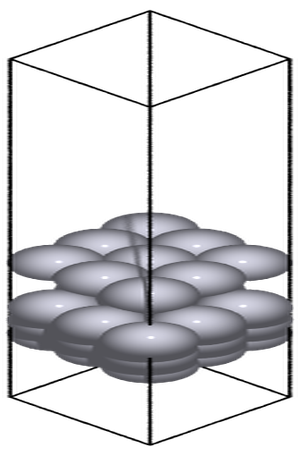

Positions: [[ 2.58691791  1.49546159 11.2274448 ]
 [ 3.85606372  3.69929971 11.33864917]
 [ 5.12520954  5.90313784 11.44985354]
 [ 5.13007217  1.49546159 11.33864917]
 [ 6.39921798  3.69929971 11.44985354]
 [ 7.6683638   5.90313784 11.56105791]
 [ 7.67322643  1.49546159 11.44985354]
 [ 8.94237224  3.69929971 11.56105791]
 [10.21151806  5.90313784 11.67226228]
 [ 0.13615357  0.0787085   9.00335737]
 [ 1.40529939  2.28254663  9.11456174]
 [ 2.67444521  4.48638476  9.22576611]
 [ 2.67930783  0.0787085   9.11456174]
 [ 3.94845365  2.28254663  9.22576611]
 [ 5.21759947  4.48638476  9.33697048]
 [ 5.22246209  0.0787085   9.22576611]
 [ 6.49160791  2.28254663  9.33697048]
 [ 7.76075373  4.48638476  9.44817486]
 [ 1.49768932  0.86579355  7.00167868]
 [ 2.76683513  3.06963168  7.11288306]
 [ 4.03598095  5.2734698   7.22408743]
 [ 4.04084357  0.86579355  7.11288306]
 [ 5.30998939  3.06963168  7.22408743]
 [ 6.57913521  5.2734698   7.3352918 ]
 [ 6.58399783  0.86579355  7.22408743]
 [ 7.85314365 

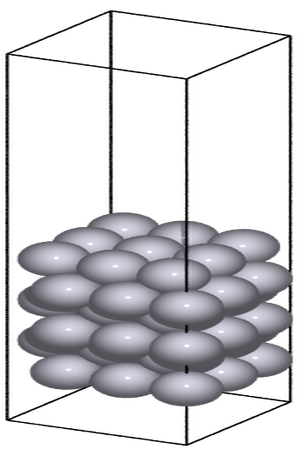

Positions: [[0.00000000e+00 0.00000000e+00 1.22000000e+01]
 [4.09361195e-16 2.54558441e+00 1.22000000e+01]
 [8.18722390e-16 5.09116882e+00 1.22000000e+01]
 [2.54558441e+00 0.00000000e+00 1.22000000e+01]
 [2.54558441e+00 2.54558441e+00 1.22000000e+01]
 [2.54558441e+00 5.09116882e+00 1.22000000e+01]
 [5.09116882e+00 0.00000000e+00 1.22000000e+01]
 [5.09116882e+00 2.54558441e+00 1.22000000e+01]
 [5.09116882e+00 5.09116882e+00 1.22000000e+01]
 [1.27279221e+00 1.27279221e+00 1.40000000e+01]
 [1.27279221e+00 3.81837662e+00 1.40000000e+01]
 [1.27279221e+00 6.36396103e+00 1.40000000e+01]
 [3.81837662e+00 1.27279221e+00 1.40000000e+01]
 [3.81837662e+00 3.81837662e+00 1.40000000e+01]
 [3.81837662e+00 6.36396103e+00 1.40000000e+01]
 [6.36396103e+00 1.27279221e+00 1.40000000e+01]
 [6.36396103e+00 3.81837662e+00 1.40000000e+01]
 [6.36396103e+00 6.36396103e+00 1.40000000e+01]
 [0.00000000e+00 0.00000000e+00 8.60000000e+00]
 [4.09361195e-16 2.54558441e+00 8.60000000e+00]
 [8.18722390e-16 5.09116882e+

In [89]:
for idx,slab in enumerate(slab_list):
    visual(slab, f'{facet}', (300, 300),1.52,'60z,-60x','./')
    print("Positions:", slab.get_positions())


       Step     Time          Energy          fmax
LBFGS:    0 02:56:41     -329.269470        5.467322
LBFGS:    1 02:56:45     -334.654968        4.491090
LBFGS:    2 02:56:47     -345.800110        2.964097
LBFGS:    3 02:56:49     -354.460266        2.038360
LBFGS:    4 02:56:51     -361.178741        1.804516
LBFGS:    5 02:56:53     -366.311066        1.560709
LBFGS:    6 02:56:55     -370.128815        1.342224
LBFGS:    7 02:56:57     -372.855621        1.157063
LBFGS:    8 02:57:00     -374.681519        0.981849
LBFGS:    9 02:57:02     -375.753265        0.782341
LBFGS:   10 02:57:04     -376.147034        0.584971
LBFGS:   11 02:57:05     -376.289001        0.509761
LBFGS:   12 02:57:07     -376.487671        0.277754
LBFGS:   13 02:57:09     -376.586182        0.230279
LBFGS:   14 02:57:11     -376.621826        0.199172
LBFGS:   15 02:57:14     -376.637054        0.147048
LBFGS:   16 02:57:16     -376.646942        0.090690
LBFGS:   17 02:57:18     -376.653778        0.02

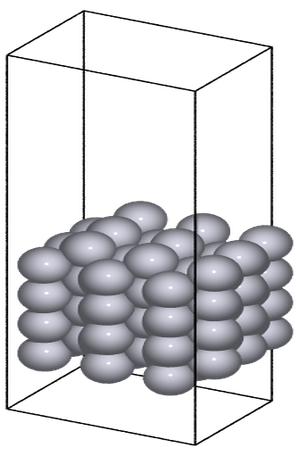

========after========


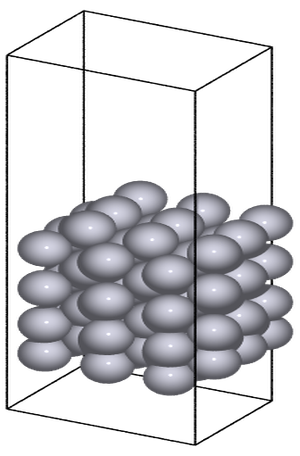

       Step     Time          Energy          fmax
LBFGS:    0 02:57:22     -165.369354        6.093455
LBFGS:    1 02:57:23     -169.589050        4.331373
LBFGS:    2 02:57:24     -177.089142        2.348115
LBFGS:    3 02:57:25     -181.861053        1.446204
LBFGS:    4 02:57:26     -184.644501        0.911363
LBFGS:    5 02:57:28     -186.147247        0.553787
LBFGS:    6 02:57:29     -186.787659        0.272138
LBFGS:    7 02:57:30     -186.885086        0.151633
LBFGS:    8 02:57:31     -186.894180        0.105573
LBFGS:    9 02:57:32     -186.895950        0.085611
LBFGS:   10 02:57:33     -186.899185        0.042273
========before========


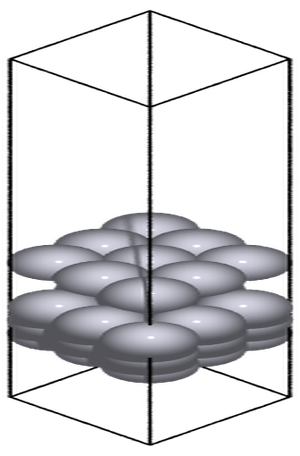

========after========


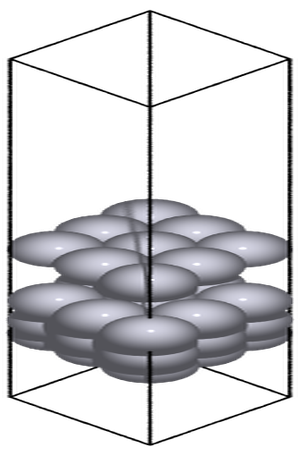

       Step     Time          Energy          fmax
LBFGS:    0 02:57:37     -243.277145        7.354652
LBFGS:    1 02:57:39     -248.976837        4.736386
LBFGS:    2 02:57:40     -256.980042        2.876654
LBFGS:    3 02:57:42     -263.173309        2.836369
LBFGS:    4 02:57:45     -268.110352        2.488995
LBFGS:    5 02:57:46     -271.870392        2.041694
LBFGS:    6 02:57:48     -274.541504        1.574165
LBFGS:    7 02:57:49     -276.264191        1.136751
LBFGS:    8 02:57:51     -277.201141        0.750996
LBFGS:    9 02:57:52     -277.470825        0.562085
LBFGS:   10 02:57:54     -277.641022        0.513798
LBFGS:   11 02:57:55     -277.909515        0.433847
LBFGS:   12 02:57:58     -278.181488        0.176312
LBFGS:   13 02:58:00     -278.253082        0.155054
LBFGS:   14 02:58:02     -278.288330        0.078224
LBFGS:   15 02:58:03     -278.289581        0.054210
LBFGS:   16 02:58:05     -278.290558        0.033024
========before========


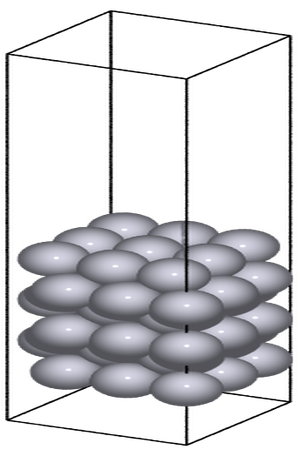

========after========


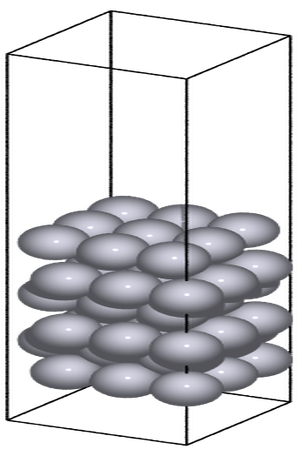

In [90]:
for idx2,slab in enumerate(slab_list):
    after = slab.copy()
    tot_energy = energy_cal(after, fmax=0.05)  # Adjust fmax as needed
    print(f'========before========')
    visual(slab, f'{facet}', (300, 300),1.52,'60z,-60x','./')
    print(f'========after========')
    visual(after, f'{facet}', (300, 300),1.52,'60z,-60x','./')
    #write(f'/content/drive/MyDrive/{idx}_{facets[idx]}_relaxed.vasp',atoms)


숙제: surface 에너지 구해오기. + 221, 210, 331 등 step surface도 계산해보기

In [92]:
surf_111=slab_list[1]

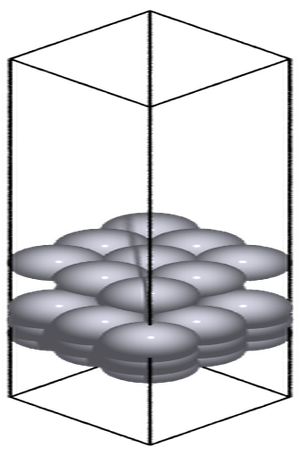

MSONAtoms(symbols='Pt36', pbc=True, cell=[[7.6294627786021945, 0.0, 0.3336131141362166], [3.807437447830159, 6.611514378032986, 0.3336131141362166], [0.0, 0.0, 29.135545301229563]], bulk_equivalent=..., bulk_wyckoff=..., constraint=FixAtoms(indices=[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]))
['REDIRECT', '__add__', '__ase_optimizable__', '__class__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__get_validators__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__modify_schema__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_ase_handles_dynamic_stress', '_calc', '_celldisp', '_cellobj', '_centering_as_array', '_

In [93]:
visual(surf_111, f'test', (300, 300),1.52,'60z,-60x','./')
print(surf_111)
print(dir(surf_111))

## 흡착도 시켜보자.

[7.62946278 0.         0.33361311]
11.672262282724333
[0. 0. 0.]
[ 5.          5.         12.67226228]
========before========


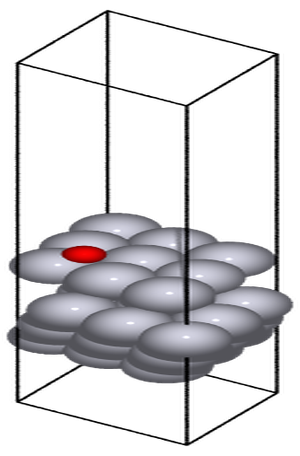

========after========
       Step     Time          Energy          fmax
LBFGS:    0 03:03:20     -164.866791       31.300597
LBFGS:    1 03:03:21     -170.309479        6.350054
LBFGS:    2 03:03:22     -174.849197        4.055816
LBFGS:    3 03:03:23     -181.057678        3.266364
LBFGS:    4 03:03:24     -185.272644        2.824575
LBFGS:    5 03:03:25     -188.037964        2.323787
LBFGS:    6 03:03:26     -189.822525        1.788230
LBFGS:    7 03:03:27     -190.935074        1.291909
LBFGS:    8 03:03:27     -191.571625        0.802056
LBFGS:    9 03:03:28     -191.872070        0.761060
LBFGS:   10 03:03:29     -191.950912        0.809422
LBFGS:   11 03:03:31     -192.024033        0.879773
LBFGS:   12 03:03:32     -192.177078        0.956689
LBFGS:   13 03:03:33     -192.342636        0.775150
LBFGS:   14 03:03:34     -192.534271        0.814374
LBFGS:   15 03:03:35     -192.812439        0.795557
LBFGS:   16 03:03:36     -193.070511        1.230739
LBFGS:   17 03:03:37     -

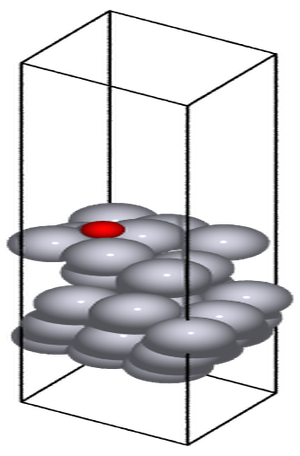

-194.3


In [103]:
from ase import build, Atom

o = Atom('O')
slab=surf_111.copy()
z_positions=[atom.position[2] for atom in slab]
pt_zmax=np.max(z_positions)
print(slab.cell[0])
print(pt_zmax)
print(o.position)
o.position= np.array([5,5,pt_zmax]) +np.array([0,0,1.5])
print(o.position)
slab=slab + o
print(f'========before========')
visual(slab, f'{facet}', (300, 300),1.52,'70z,-60x','./')
print(f'========after========')
adslab_energy=energy_cal(slab)
visual(slab, f'{facet}', (300, 300),1.52,'70z,-60x','./')
print(round(adslab_energy,2))

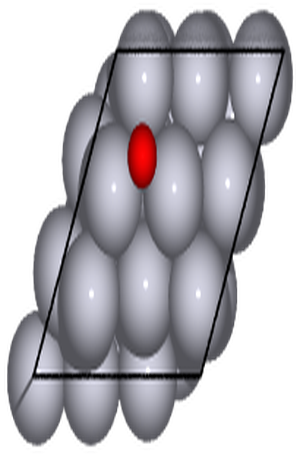

In [104]:
visual(slab, f'{facet}', (300, 300),1.52,'0z,-0x','./')


숙제: facet마다 O, H, CO 흡착 계산해보기.

계산한 구조 추출 .vasp 이나 .xyz등으로 저장할 수 있음.

In [105]:
write('./myfilename.vasp',slab)
write('./myfilename.xyz',slab)
